**United States Cities by Population**

In [1]:
# Imports
from bs4 import BeautifulSoup
import requests
import pandas as pd

**WEB SCRAPPING**

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of United States cities by population - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feat

In [4]:
table = soup.find_all('table')[2]
print(table)

<table class="sortable wikitable sticky-header-multi static-row-numbers sort-under col1left col2center" style="text-align:right">
<tbody><tr>
<th rowspan="2">City
</th>
<th rowspan="2"><abbr title="State or district">ST</abbr>
</th>
<th rowspan="2">2023<br/>estimate
</th>
<th rowspan="2">2020<br/>census
</th>
<th rowspan="2">Change
</th>
<th colspan="2">2020 land area
</th>
<th colspan="2">2020 density
</th>
<th rowspan="2">Location
</th></tr>
<tr class="static-row-header">
<th>mi<sup>2</sup>
</th>
<th>km<sup>2</sup>
</th>
<th>/ mi<sup>2</sup>
</th>
<th>/ km<sup>2</sup>
</th></tr>
<tr>
<td style="background-color:#cfecec"><i><a href="/wiki/New_York_City" title="New York City">New York</a></i><sup class="reference" id="cite_ref-5"><a href="#cite_note-5"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</td>
<td><a href="/wiki/New_York_(state)" title="New York (state)">NY</a>
</td>
<td style="text-align:right;">8,258,035
</td>
<td style="text-align:right;

In [5]:
columns = table.find_all('th') 
print(columns)

[<th rowspan="2">City
</th>, <th rowspan="2"><abbr title="State or district">ST</abbr>
</th>, <th rowspan="2">2023<br/>estimate
</th>, <th rowspan="2">2020<br/>census
</th>, <th rowspan="2">Change
</th>, <th colspan="2">2020 land area
</th>, <th colspan="2">2020 density
</th>, <th rowspan="2">Location
</th>, <th>mi<sup>2</sup>
</th>, <th>km<sup>2</sup>
</th>, <th>/ mi<sup>2</sup>
</th>, <th>/ km<sup>2</sup>
</th>]


In [6]:
columns_titles = [title.text.strip() for title in columns]
print(columns_titles)

['City', 'ST', '2023estimate', '2020census', 'Change', '2020 land area', '2020 density', 'Location', 'mi2', 'km2', '/ mi2', '/ km2']


In [7]:
df = pd.DataFrame(columns = columns_titles)
df

,City,ST,2023estimate,2020census,Change,2020 land area,2020 density,Location,mi2,km2,/ mi2,/ km2


In [8]:
# Create the DataFrame with the specified columns
columns_titles = [
    "City", "ST", "2023estimate", "2020census", "Change", 
    "2020 land area (mi2)", "2020 land area (km2)", 
    "2020 density (/ mi2)", "2020 density (/ km2)", "Location"
]
df = pd.DataFrame(columns=columns_titles)
df

,City,ST,2023estimate,2020census,Change,2020 land area (mi2),2020 land area (km2),2020 density (/ mi2),2020 density (/ km2),Location


In [9]:
# Find all rows in the table
rows = table.find_all('tr')

In [10]:
# Iterate over each row (except the first one, which is the header)
for row in rows[1:]:
    row_data = row.find_all('td')
    individual_row = [data.text.strip() for data in row_data]
    
    # Check if the row has the correct number of elements
    if len(individual_row) == len(df.columns):
        length = len(df)
        df.loc[length] = individual_row
df

,City,ST,2023estimate,2020census,Change,2020 land area (mi2),2020 land area (km2),2020 density (/ mi2),2020 density (/ km2),Location
0,New York[c],NY,"8,258,035","8,804,190",−6.20%,300.5,778.3,"29,298","11,312",40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; ...
1,Los Angeles,CA,"3,820,914","3,898,747",−2.00%,469.5,"1,216.0","8,304","3,206",34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02...
2,Chicago,IL,"2,664,452","2,746,388",−2.98%,227.7,589.7,"12,061","4,657",41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; ...
3,Houston,TX,"2,314,157","2,304,580",+0.42%,640.4,"1,658.6","3,599","1,390",29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; ...
4,Phoenix,AZ,"1,650,070","1,608,139",+2.61%,518.0,"1,341.6","3,105","1,199",33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W﻿ / 33.57...
...,...,...,...,...,...,...,...,...,...,...
331,Yuma,AZ,"100,858","95,548",+5.56%,120.7,312.6,792,306,32°31′N 114°31′W﻿ / ﻿32.52°N 114.52°W﻿ / 32.52...
332,New Bedford,MA,"100,695","101,079",−0.38%,20.0,51.8,"5,054","1,951",41°40′N 70°56′W﻿ / ﻿41.66°N 70.94°W﻿ / 41.66; ...
333,Suffolk[l],VA,"100,659","94,324",+6.72%,399.2,"1,033.9",236,91,36°42′N 76°38′W﻿ / ﻿36.70°N 76.63°W﻿ / 36.70; ...
334,Hesperia,CA,"100,633","99,818",+0.82%,72.7,188.3,"1,373",530,34°24′N 117°19′W﻿ / ﻿34.40°N 117.32°W﻿ / 34.40...


In [11]:
# Send this to the computer as a CSV to check somethings in Excel faster
df.to_csv(r'C:\Users\gerar\Downloads\US Cities.csv', index = False)

**DATA PREPROCESSING**

In [13]:
# Delete posibles duplicates
df = df.drop_duplicates()
df

,City,ST,2023estimate,2020census,Change,2020 land area (mi2),2020 land area (km2),2020 density (/ mi2),2020 density (/ km2),Location
0,New York[c],NY,"8,258,035","8,804,190",−6.20%,300.5,778.3,"29,298","11,312",40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; ...
1,Los Angeles,CA,"3,820,914","3,898,747",−2.00%,469.5,"1,216.0","8,304","3,206",34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02...
2,Chicago,IL,"2,664,452","2,746,388",−2.98%,227.7,589.7,"12,061","4,657",41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; ...
3,Houston,TX,"2,314,157","2,304,580",+0.42%,640.4,"1,658.6","3,599","1,390",29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; ...
4,Phoenix,AZ,"1,650,070","1,608,139",+2.61%,518.0,"1,341.6","3,105","1,199",33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W﻿ / 33.57...
...,...,...,...,...,...,...,...,...,...,...
331,Yuma,AZ,"100,858","95,548",+5.56%,120.7,312.6,792,306,32°31′N 114°31′W﻿ / ﻿32.52°N 114.52°W﻿ / 32.52...
332,New Bedford,MA,"100,695","101,079",−0.38%,20.0,51.8,"5,054","1,951",41°40′N 70°56′W﻿ / ﻿41.66°N 70.94°W﻿ / 41.66; ...
333,Suffolk[l],VA,"100,659","94,324",+6.72%,399.2,"1,033.9",236,91,36°42′N 76°38′W﻿ / ﻿36.70°N 76.63°W﻿ / 36.70; ...
334,Hesperia,CA,"100,633","99,818",+0.82%,72.7,188.3,"1,373",530,34°24′N 117°19′W﻿ / ﻿34.40°N 117.32°W﻿ / 34.40...


In [14]:
# Used regex to delete [] in 'City'
df['City'] = df['City'].str.replace(r'\[.*?\]', '', regex=True)
df

,City,ST,2023estimate,2020census,Change,2020 land area (mi2),2020 land area (km2),2020 density (/ mi2),2020 density (/ km2),Location
0,New York,NY,"8,258,035","8,804,190",−6.20%,300.5,778.3,"29,298","11,312",40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; ...
1,Los Angeles,CA,"3,820,914","3,898,747",−2.00%,469.5,"1,216.0","8,304","3,206",34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02...
2,Chicago,IL,"2,664,452","2,746,388",−2.98%,227.7,589.7,"12,061","4,657",41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; ...
3,Houston,TX,"2,314,157","2,304,580",+0.42%,640.4,"1,658.6","3,599","1,390",29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; ...
4,Phoenix,AZ,"1,650,070","1,608,139",+2.61%,518.0,"1,341.6","3,105","1,199",33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W﻿ / 33.57...
...,...,...,...,...,...,...,...,...,...,...
331,Yuma,AZ,"100,858","95,548",+5.56%,120.7,312.6,792,306,32°31′N 114°31′W﻿ / ﻿32.52°N 114.52°W﻿ / 32.52...
332,New Bedford,MA,"100,695","101,079",−0.38%,20.0,51.8,"5,054","1,951",41°40′N 70°56′W﻿ / ﻿41.66°N 70.94°W﻿ / 41.66; ...
333,Suffolk,VA,"100,659","94,324",+6.72%,399.2,"1,033.9",236,91,36°42′N 76°38′W﻿ / ﻿36.70°N 76.63°W﻿ / 36.70; ...
334,Hesperia,CA,"100,633","99,818",+0.82%,72.7,188.3,"1,373",530,34°24′N 117°19′W﻿ / ﻿34.40°N 117.32°W﻿ / 34.40...


In [15]:
# Making sure there are no Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 335
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   City                  336 non-null    object
 1   ST                    336 non-null    object
 2   2023estimate          336 non-null    object
 3   2020census            336 non-null    object
 4   Change                336 non-null    object
 5   2020 land area (mi2)  336 non-null    object
 6   2020 land area (km2)  336 non-null    object
 7   2020 density (/ mi2)  336 non-null    object
 8   2020 density (/ km2)  336 non-null    object
 9   Location              336 non-null    object
dtypes: object(10)
memory usage: 28.9+ KB


In [16]:
# Change data type so I can delete comas later
df['2023estimate'] = df['2023estimate'].astype(str)
df['2020census'] = df['2020census'].astype(str)
df['2020 land area (mi2)'] = df['2020 land area (mi2)'].astype(str)
df['2020 land area (km2)'] = df['2020 land area (km2)'].astype(str)
df['2020 density (/ mi2)'] = df['2020 density (/ mi2)'].astype(str)
df['2020 density (/ km2)'] = df['2020 density (/ km2)'].astype(str)
df['Change'] = df['Change'].astype(str)

In [17]:
# Delete commas and convert to numbers
df['2023estimate'] = df['2023estimate'].str.replace(',', '').astype(int)
df['2020census'] = df['2020census'].str.replace(',', '').astype(int)
df['2020 land area (mi2)'] = df['2020 land area (mi2)'].str.replace(',', '').astype(float)
df['2020 land area (km2)'] = df['2020 land area (km2)'].str.replace(',', '').astype(float)
df['2020 density (/ mi2)'] = df['2020 density (/ mi2)'].str.replace(',', '').astype(int)
df['2020 density (/ km2)'] = df['2020 density (/ km2)'].str.replace(',', '').astype(int)
df['Change'] = df['Change'].str.replace('−', '-').str.rstrip('%').astype(float)
df

,City,ST,2023estimate,2020census,Change,2020 land area (mi2),2020 land area (km2),2020 density (/ mi2),2020 density (/ km2),Location
0,New York,NY,8258035,8804190,-6.20,300.5,778.3,29298,11312,40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; ...
1,Los Angeles,CA,3820914,3898747,-2.00,469.5,1216.0,8304,3206,34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02...
2,Chicago,IL,2664452,2746388,-2.98,227.7,589.7,12061,4657,41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; ...
3,Houston,TX,2314157,2304580,0.42,640.4,1658.6,3599,1390,29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; ...
4,Phoenix,AZ,1650070,1608139,2.61,518.0,1341.6,3105,1199,33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W﻿ / 33.57...
...,...,...,...,...,...,...,...,...,...,...
331,Yuma,AZ,100858,95548,5.56,120.7,312.6,792,306,32°31′N 114°31′W﻿ / ﻿32.52°N 114.52°W﻿ / 32.52...
332,New Bedford,MA,100695,101079,-0.38,20.0,51.8,5054,1951,41°40′N 70°56′W﻿ / ﻿41.66°N 70.94°W﻿ / 41.66; ...
333,Suffolk,VA,100659,94324,6.72,399.2,1033.9,236,91,36°42′N 76°38′W﻿ / ﻿36.70°N 76.63°W﻿ / 36.70; ...
334,Hesperia,CA,100633,99818,0.82,72.7,188.3,1373,530,34°24′N 117°19′W﻿ / ﻿34.40°N 117.32°W﻿ / 34.40...


In [18]:
# See all the information in Location
pd.set_option('display.max_colwidth', None)
df

,City,ST,2023estimate,2020census,Change,2020 land area (mi2),2020 land area (km2),2020 density (/ mi2),2020 density (/ km2),Location
0,New York,NY,8258035,8804190,-6.20,300.5,778.3,29298,11312,40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; -73.94﻿ (New York City)
1,Los Angeles,CA,3820914,3898747,-2.00,469.5,1216.0,8304,3206,34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02; -118.41﻿ (Los Angeles)
2,Chicago,IL,2664452,2746388,-2.98,227.7,589.7,12061,4657,41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; -87.68﻿ (Chicago)
3,Houston,TX,2314157,2304580,0.42,640.4,1658.6,3599,1390,29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; -95.39﻿ (Houston)
4,Phoenix,AZ,1650070,1608139,2.61,518.0,1341.6,3105,1199,33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W﻿ / 33.57; -112.09﻿ (Phoenix)
...,...,...,...,...,...,...,...,...,...,...
331,Yuma,AZ,100858,95548,5.56,120.7,312.6,792,306,32°31′N 114°31′W﻿ / ﻿32.52°N 114.52°W﻿ / 32.52; -114.52﻿ (Yuma)
332,New Bedford,MA,100695,101079,-0.38,20.0,51.8,5054,1951,41°40′N 70°56′W﻿ / ﻿41.66°N 70.94°W﻿ / 41.66; -70.94﻿ (New Bedford)
333,Suffolk,VA,100659,94324,6.72,399.2,1033.9,236,91,36°42′N 76°38′W﻿ / ﻿36.70°N 76.63°W﻿ / 36.70; -76.63﻿ (Suffolk)
334,Hesperia,CA,100633,99818,0.82,72.7,188.3,1373,530,34°24′N 117°19′W﻿ / ﻿34.40°N 117.32°W﻿ / 34.40; -117.32﻿ (Hesperia)


In [19]:
# Function to extract decimal coordinates from the Location column using regex and regex librarie
def extract_decimal_coordinates(location):
    match = re.search(r'([0-9.]+); -?([0-9.]+)', location)
    if match:
        latitude = float(match.group(1))
        longitude = float(match.group(2))
        # Añadir signo negativo a la longitud si es necesario
        if longitude > 0:
            longitude = -longitude
        return latitude, longitude
    return None, None
df['Latitude'], df['Longitude'] = zip(*df['Location'].apply(extract_decimal_coordinates))
df

,City,ST,2023estimate,2020census,Change,2020 land area (mi2),2020 land area (km2),2020 density (/ mi2),2020 density (/ km2),Location,Latitude,Longitude
0,New York,NY,8258035,8804190,-6.20,300.5,778.3,29298,11312,40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; -73.94﻿ (New York City),40.66,-73.94
1,Los Angeles,CA,3820914,3898747,-2.00,469.5,1216.0,8304,3206,34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02; -118.41﻿ (Los Angeles),34.02,-118.41
2,Chicago,IL,2664452,2746388,-2.98,227.7,589.7,12061,4657,41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; -87.68﻿ (Chicago),41.84,-87.68
3,Houston,TX,2314157,2304580,0.42,640.4,1658.6,3599,1390,29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; -95.39﻿ (Houston),29.79,-95.39
4,Phoenix,AZ,1650070,1608139,2.61,518.0,1341.6,3105,1199,33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W﻿ / 33.57; -112.09﻿ (Phoenix),33.57,-112.09
...,...,...,...,...,...,...,...,...,...,...,...,...
331,Yuma,AZ,100858,95548,5.56,120.7,312.6,792,306,32°31′N 114°31′W﻿ / ﻿32.52°N 114.52°W﻿ / 32.52; -114.52﻿ (Yuma),32.52,-114.52
332,New Bedford,MA,100695,101079,-0.38,20.0,51.8,5054,1951,41°40′N 70°56′W﻿ / ﻿41.66°N 70.94°W﻿ / 41.66; -70.94﻿ (New Bedford),41.66,-70.94
333,Suffolk,VA,100659,94324,6.72,399.2,1033.9,236,91,36°42′N 76°38′W﻿ / ﻿36.70°N 76.63°W﻿ / 36.70; -76.63﻿ (Suffolk),36.70,-76.63
334,Hesperia,CA,100633,99818,0.82,72.7,188.3,1373,530,34°24′N 117°19′W﻿ / ﻿34.40°N 117.32°W﻿ / 34.40; -117.32﻿ (Hesperia),34.40,-117.32


In [20]:
# Standardize change
df = df.rename(columns={'Change': 'Change (%)'})
df['Change (%)'] = df['Change (%)'] / 100
df

,City,ST,2023estimate,2020census,Change (%),2020 land area (mi2),2020 land area (km2),2020 density (/ mi2),2020 density (/ km2),Location,Latitude,Longitude
0,New York,NY,8258035,8804190,-0.0620,300.5,778.3,29298,11312,40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; -73.94﻿ (New York City),40.66,-73.94
1,Los Angeles,CA,3820914,3898747,-0.0200,469.5,1216.0,8304,3206,34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02; -118.41﻿ (Los Angeles),34.02,-118.41
2,Chicago,IL,2664452,2746388,-0.0298,227.7,589.7,12061,4657,41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; -87.68﻿ (Chicago),41.84,-87.68
3,Houston,TX,2314157,2304580,0.0042,640.4,1658.6,3599,1390,29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; -95.39﻿ (Houston),29.79,-95.39
4,Phoenix,AZ,1650070,1608139,0.0261,518.0,1341.6,3105,1199,33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W﻿ / 33.57; -112.09﻿ (Phoenix),33.57,-112.09
...,...,...,...,...,...,...,...,...,...,...,...,...
331,Yuma,AZ,100858,95548,0.0556,120.7,312.6,792,306,32°31′N 114°31′W﻿ / ﻿32.52°N 114.52°W﻿ / 32.52; -114.52﻿ (Yuma),32.52,-114.52
332,New Bedford,MA,100695,101079,-0.0038,20.0,51.8,5054,1951,41°40′N 70°56′W﻿ / ﻿41.66°N 70.94°W﻿ / 41.66; -70.94﻿ (New Bedford),41.66,-70.94
333,Suffolk,VA,100659,94324,0.0672,399.2,1033.9,236,91,36°42′N 76°38′W﻿ / ﻿36.70°N 76.63°W﻿ / 36.70; -76.63﻿ (Suffolk),36.70,-76.63
334,Hesperia,CA,100633,99818,0.0082,72.7,188.3,1373,530,34°24′N 117°19′W﻿ / ﻿34.40°N 117.32°W﻿ / 34.40; -117.32﻿ (Hesperia),34.40,-117.32


In [21]:
# Rename columns
df = df.rename(columns={'2023estimate': '2023 estimate'})
df = df.rename(columns={'2020census': "2020 census"})
df = df.rename(columns={'2020 density (/ mi2)': '2020 density (/mi2)'})
df = df.rename(columns={'2020 density (/ km2)': '2020 density (/km2)'})
df

,City,ST,2023 estimate,2020 census,Change (%),2020 land area (mi2),2020 land area (km2),2020 density (/mi2),2020 density (/km2),Location,Latitude,Longitude
0,New York,NY,8258035,8804190,-0.0620,300.5,778.3,29298,11312,40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; -73.94﻿ (New York City),40.66,-73.94
1,Los Angeles,CA,3820914,3898747,-0.0200,469.5,1216.0,8304,3206,34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02; -118.41﻿ (Los Angeles),34.02,-118.41
2,Chicago,IL,2664452,2746388,-0.0298,227.7,589.7,12061,4657,41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; -87.68﻿ (Chicago),41.84,-87.68
3,Houston,TX,2314157,2304580,0.0042,640.4,1658.6,3599,1390,29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; -95.39﻿ (Houston),29.79,-95.39
4,Phoenix,AZ,1650070,1608139,0.0261,518.0,1341.6,3105,1199,33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W﻿ / 33.57; -112.09﻿ (Phoenix),33.57,-112.09
...,...,...,...,...,...,...,...,...,...,...,...,...
331,Yuma,AZ,100858,95548,0.0556,120.7,312.6,792,306,32°31′N 114°31′W﻿ / ﻿32.52°N 114.52°W﻿ / 32.52; -114.52﻿ (Yuma),32.52,-114.52
332,New Bedford,MA,100695,101079,-0.0038,20.0,51.8,5054,1951,41°40′N 70°56′W﻿ / ﻿41.66°N 70.94°W﻿ / 41.66; -70.94﻿ (New Bedford),41.66,-70.94
333,Suffolk,VA,100659,94324,0.0672,399.2,1033.9,236,91,36°42′N 76°38′W﻿ / ﻿36.70°N 76.63°W﻿ / 36.70; -76.63﻿ (Suffolk),36.70,-76.63
334,Hesperia,CA,100633,99818,0.0082,72.7,188.3,1373,530,34°24′N 117°19′W﻿ / ﻿34.40°N 117.32°W﻿ / 34.40; -117.32﻿ (Hesperia),34.40,-117.32


Extract the color code to a table column
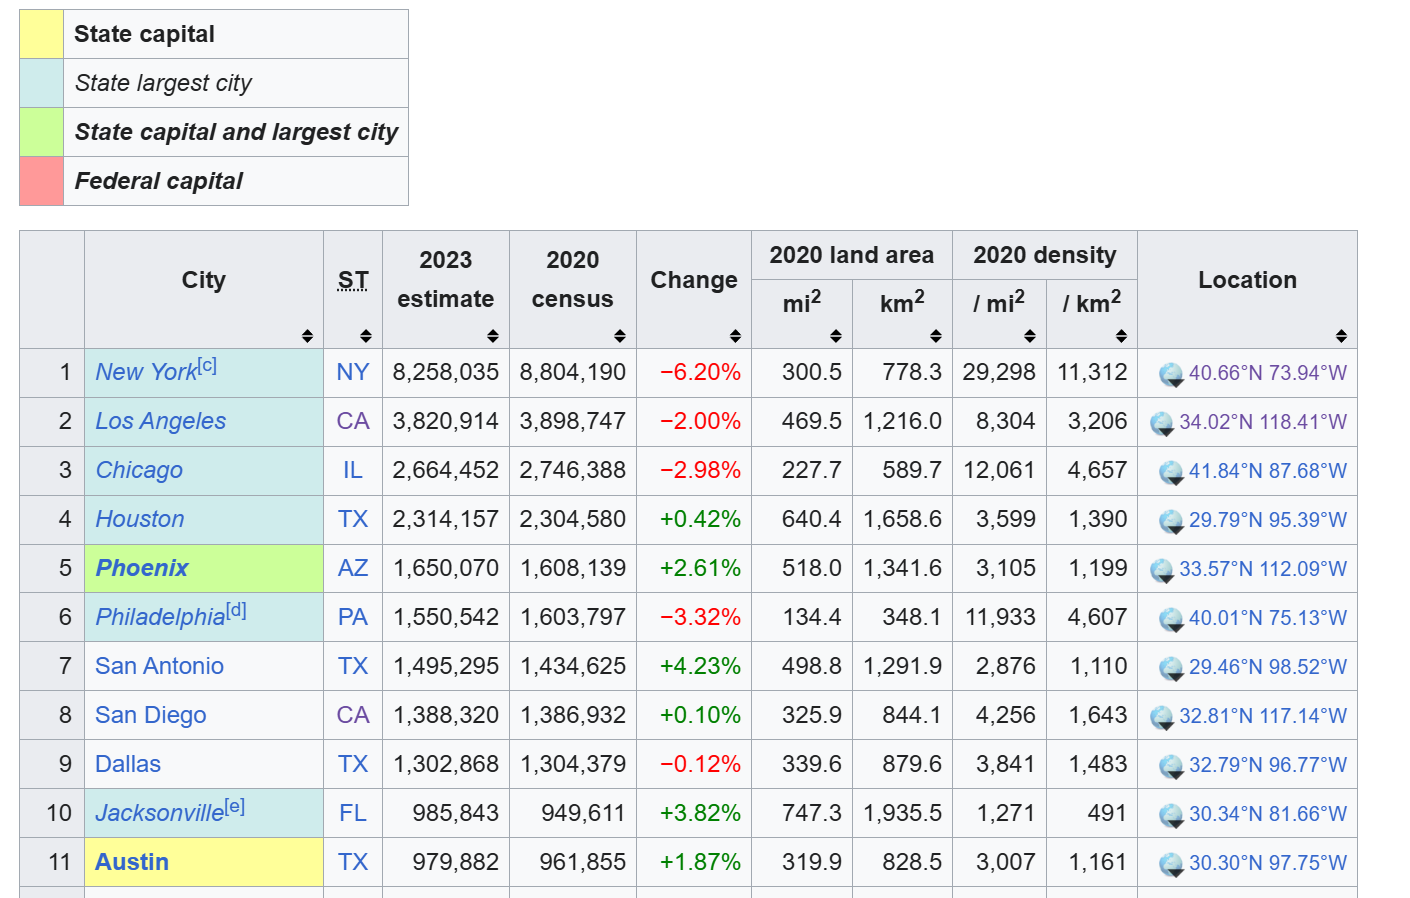

In [24]:
def get_category(style):
    if 'background-color:#ffff99' in style:
        return 'State capital'
    elif 'background-color:#cfecec' in style:
        return 'State largest city'
    elif 'background-color:#ccff99' in style:
        return 'State capital and largest city'
    elif 'background-color:#ffb3b3' in style:
        return 'Federal Capital'
    else:
        return 'Regular City'

categories = []

for tr in table.find_all('tr')[1:]: 
    cols = tr.find_all('td')
    if cols:
        style = cols[0].get('style', '')
        category = get_category(style)
        categories.append(category)

df['Category'] = categories

df

,City,ST,2023 estimate,2020 census,Change (%),2020 land area (mi2),2020 land area (km2),2020 density (/mi2),2020 density (/km2),Location,Latitude,Longitude,Category
0,New York,NY,8258035,8804190,-0.0620,300.5,778.3,29298,11312,40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; -73.94﻿ (New York City),40.66,-73.94,State largest city
1,Los Angeles,CA,3820914,3898747,-0.0200,469.5,1216.0,8304,3206,34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02; -118.41﻿ (Los Angeles),34.02,-118.41,State largest city
2,Chicago,IL,2664452,2746388,-0.0298,227.7,589.7,12061,4657,41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W﻿ / 41.84; -87.68﻿ (Chicago),41.84,-87.68,State largest city
3,Houston,TX,2314157,2304580,0.0042,640.4,1658.6,3599,1390,29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W﻿ / 29.79; -95.39﻿ (Houston),29.79,-95.39,State largest city
4,Phoenix,AZ,1650070,1608139,0.0261,518.0,1341.6,3105,1199,33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W﻿ / 33.57; -112.09﻿ (Phoenix),33.57,-112.09,State capital and largest city
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,Yuma,AZ,100858,95548,0.0556,120.7,312.6,792,306,32°31′N 114°31′W﻿ / ﻿32.52°N 114.52°W﻿ / 32.52; -114.52﻿ (Yuma),32.52,-114.52,Regular City
332,New Bedford,MA,100695,101079,-0.0038,20.0,51.8,5054,1951,41°40′N 70°56′W﻿ / ﻿41.66°N 70.94°W﻿ / 41.66; -70.94﻿ (New Bedford),41.66,-70.94,Regular City
333,Suffolk,VA,100659,94324,0.0672,399.2,1033.9,236,91,36°42′N 76°38′W﻿ / ﻿36.70°N 76.63°W﻿ / 36.70; -76.63﻿ (Suffolk),36.70,-76.63,Regular City
334,Hesperia,CA,100633,99818,0.0082,72.7,188.3,1373,530,34°24′N 117°19′W﻿ / ﻿34.40°N 117.32°W﻿ / 34.40; -117.32﻿ (Hesperia),34.40,-117.32,Regular City


In [25]:
# Delete the Location column because we won't need it
df = df.drop(columns=['Location'])
df

,City,ST,2023 estimate,2020 census,Change (%),2020 land area (mi2),2020 land area (km2),2020 density (/mi2),2020 density (/km2),Latitude,Longitude,Category
0,New York,NY,8258035,8804190,-0.0620,300.5,778.3,29298,11312,40.66,-73.94,State largest city
1,Los Angeles,CA,3820914,3898747,-0.0200,469.5,1216.0,8304,3206,34.02,-118.41,State largest city
2,Chicago,IL,2664452,2746388,-0.0298,227.7,589.7,12061,4657,41.84,-87.68,State largest city
3,Houston,TX,2314157,2304580,0.0042,640.4,1658.6,3599,1390,29.79,-95.39,State largest city
4,Phoenix,AZ,1650070,1608139,0.0261,518.0,1341.6,3105,1199,33.57,-112.09,State capital and largest city
...,...,...,...,...,...,...,...,...,...,...,...,...
331,Yuma,AZ,100858,95548,0.0556,120.7,312.6,792,306,32.52,-114.52,Regular City
332,New Bedford,MA,100695,101079,-0.0038,20.0,51.8,5054,1951,41.66,-70.94,Regular City
333,Suffolk,VA,100659,94324,0.0672,399.2,1033.9,236,91,36.70,-76.63,Regular City
334,Hesperia,CA,100633,99818,0.0082,72.7,188.3,1373,530,34.40,-117.32,Regular City


In [26]:
# Add information that the data source didn't had
new_data = [
    ["Cheyenne", "WY", 65000, 64235, 0.0119, 27.0, 69.9, 2407, 930, 41.14, -104.82, "State capital"],
    ["Charleston", "WV", 48100, 48672, -0.0118, 31.6, 81.9, 1522, 588, 38.35, -81.63, "State capital"]
]

new_df = pd.DataFrame(new_data, columns=[
    "City", "ST", "2023 estimate", "2020 census", "Change (%)", 
    "2020 land area (mi2)", "2020 land area (km2)", 
    "2020 density (/mi2)", "2020 density (/km2)", 
    "Latitude", "Longitude", "Category"
])

df = pd.concat([df, new_df], ignore_index=True)

In [27]:
# Verify that everything is correct
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df

,City,ST,2023 estimate,2020 census,Change (%),2020 land area (mi2),2020 land area (km2),2020 density (/mi2),2020 density (/km2),Latitude,Longitude,Category
0,New York,NY,8258035,8804190,-0.0620,300.5,778.3,29298,11312,40.66,-73.94,State largest city
1,Los Angeles,CA,3820914,3898747,-0.0200,469.5,1216.0,8304,3206,34.02,-118.41,State largest city
2,Chicago,IL,2664452,2746388,-0.0298,227.7,589.7,12061,4657,41.84,-87.68,State largest city
3,Houston,TX,2314157,2304580,0.0042,640.4,1658.6,3599,1390,29.79,-95.39,State largest city
4,Phoenix,AZ,1650070,1608139,0.0261,518.0,1341.6,3105,1199,33.57,-112.09,State capital and largest city
5,Philadelphia,PA,1550542,1603797,-0.0332,134.4,348.1,11933,4607,40.01,-75.13,State largest city
6,San Antonio,TX,1495295,1434625,0.0423,498.8,1291.9,2876,1110,29.46,-98.52,Regular City
7,San Diego,CA,1388320,1386932,0.0010,325.9,844.1,4256,1643,32.81,-117.14,Regular City
8,Dallas,TX,1302868,1304379,-0.0012,339.6,879.6,3841,1483,32.79,-96.77,Regular City
9,Jacksonville,FL,985843,949611,0.0382,747.3,1935.5,1271,491,30.34,-81.66,State largest city


In [28]:
# Export the preprocessed data file to make an EDA and then visualize it in Tableau 
df.to_csv(r'C:\Users\gerar\Downloads\US Cities Preprocessed.csv', index = False)